# Project outline

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Recent Panama Leaks and Football Leaks controversies have highlighted the massive scale of global tax evasion. Then, predicting individual wealth levels may be a means to tackle this issue. Indeed, tax evasion is mainly concentrated by the highest incomes. Predicting individuals with high income levels could therefore allow for targeted and efficient surveillance.<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Moreover, such predictions may have other benefits. For example, it allows for the estimations of future income levels or the impact of economic policies on high-income indivuduals. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We build a high-income individuals detection method. We use the ["Adult Census Income" Kaggle database](https://www.kaggle.com/uciml/adult-census-income), consisting of socio-economic data on more than 30 000 persons. For example, a binary label (annual income higher than 50 000 US dollars or not) but also other features such as age, gender or the number of hours worked per week.<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Our goal is therefore to predict if an individual has an annual income higher than 50 000 US dollars or not.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;First, an exploratory analysis will give insights about the topic. Then, we will implement and compare 3 classification models through different metrics (logistic regression, k-nearest neighbor algorithm and random forest). Eventually, we will optimize our classifiers predictive quality through parameters calibration but also feature engineering methods guided by the insights if our exploratory analysis: selection of variables and additional aggregated features.

# I ) Exploratory analysis

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;First, we perform an exploratory analysis of the data. We examine the distribution of the features and the missing data. This analysis will thereafter guide our feature engineering step and therefore help the optimisation of our classification models.

In [2]:
#### Basic packages ####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math as math
import random as rd

## A ) Data checking

In [3]:
df = pd.read_csv('Adult_census_income_database.csv')
df.info()

## 32 561 observations and 15 variables : 6 quantitative variables and 9 categorical.
## 'income' feature : indicates if the annual income is higher or lower than 50 000 US dollars.

## Coding the "income" (label) into a dummy variable : 
## 1 if +50K$
## 0 if -50K$
df['income_bis'] = 1
df['income_bis'][df['income']=='<=50K'] = 0
del df['income']
df=df.rename(columns = {'income_bis':'income'})

del df['fnlwgt'] # Deleting the fnlwgt feature. It allowed for a previous ponderation 
                 # of the sample which is not needed to complete our project.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [4]:
#### Missing data ####
for elem in df.columns:
    print(str(elem))
    print(df[str(elem)].isnull().values.any())
    
## No missing data.

age
False
workclass
False
education
False
education.num
False
marital.status
False
occupation
False
relationship
False
race
False
sex
False
capital.gain
False
capital.loss
False
hours.per.week
False
native.country
False
income
False


In [5]:
#### Checking : problematical values ####

## Lists of categorical and quantitative variables : 
quali_features = ['workclass','education','marital.status','occupation',
                      'relationship', 'race', 'sex', 'native.country']
quanti_features = ['age', 'education.num', 'capital.gain', 'capital.loss', "hours.per.week", 'income']

In [6]:
#### Categorical variables ####

print("Values taken by categorical variables:")
for elem in quali_features:
    print("%s:" % str(elem))
    print("\tNombre de valeurs : ", len(df[str(elem)].unique()))
    print("\tValeurs : ", df[str(elem)].unique())
    print()
    
## 2 problematical values : 
## '?' : 'workclass' (private, public, ...)
## '?' : 'native.country'
print("\n")
print("Analysis of '?' values :")
print("Number of individuals with workclass =='?'", len(df[df['workclass']=='?']))
print("Number of individuals with occupation =='?'", len(df[df['occupation']=='?']))
print("Number of individuals with native.country =='?'", len(df[df['native.country']=='?']))
print("Number of individuals with  workclass =='?' or native.country =='?' or occupation == '?", len(df[(df['workclass']=='?') | (df['native.country']=='?')|(df['occupation']=='?') ]))

## These problematic values account for 2399 individuals among 32 561 (7,4%).
## We delete them.
df_copy = df[(df['workclass']!='?') & (df['native.country']!='?') & (df['occupation']!='?') ]
df_copy = pd.DataFrame.copy(df_copy)
print("df_copy (database without '?' values) number of individuals", len(df_copy))

Valeurs prises par les variables qualitatives :
workclass:
	Nombre de valeurs :  9
	Valeurs :  ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']

education:
	Nombre de valeurs :  16
	Valeurs :  ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']

marital.status:
	Nombre de valeurs :  7
	Valeurs :  ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']

occupation:
	Nombre de valeurs :  15
	Valeurs :  ['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty' 'Other-service'
 'Adm-clerical' 'Craft-repair' 'Transport-moving' 'Handlers-cleaners'
 'Sales' 'Farming-fishing' 'Tech-support' 'Protective-serv' 'Armed-Forces'
 'Priv-house-serv']

relationship:
	Nombre de valeurs :  6
	Valeurs :  ['Not-in-family' 'Unmarried' 'Own-child' 'Other-relativ

In [6]:
print(len(df_copy))
df_copy.tail()

30162


,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32559,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32560,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


Share of individials with more than 50 000 US$/year:  0.7510775147536636
Share of individials with less than 50 000 US$/year:  0.24892248524633645


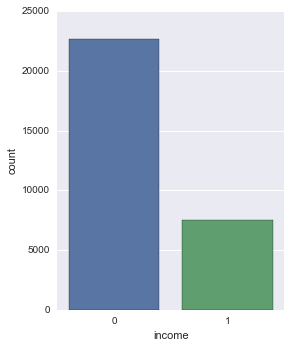

In [7]:
sns.factorplot("income",data=df_copy, kind="count", size=5, aspect=.8)
print("Share of individials with more than 50 000 US$/year: ", len(df_copy['income'][df_copy['income']==0])/len(df_copy['income']))
print("Share of individials with less than 50 000 US$/year: ", len(df_copy['income'][df_copy['income']==1])/len(df_copy['income']))

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We have built an exploitable database of 8 categorical variables, 6 quantitatives features and 30 162 observations.<br\>
Among the quantitative variables, capital.gain and capital.loss display capital incomes (as opposed to the salaries). We can also examine the age, number of years of education and of worked hours per week. 
As categorical variables, we have a binary label "income" which takes a value of 1 if the annual income is higher than 50 000 US$, but also the diploma, the work class and the native country.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The workclass, occupation and native.country display the problematical value "?" for 7.4% of the individuals. We decide to delete those observations, as they account for a small part of the database.


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The label "income" shows that 25% of individuals have an annual income higher than 50 000 US$ versus 75% of individuals with lower levels of wealth. This distribution may bias our classifications. Therefore, we will compare a discriminating model, the logistic regression, with other methods such as the KNN and the random forest algorithm. Indeed, the logistic regression predict a class whether than the other, but not the class itself.

## B) Categorical variables
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We now focus on categorical variables. The share of high-income individuals among the different values of a variable may reflect the discriminating power of those values.

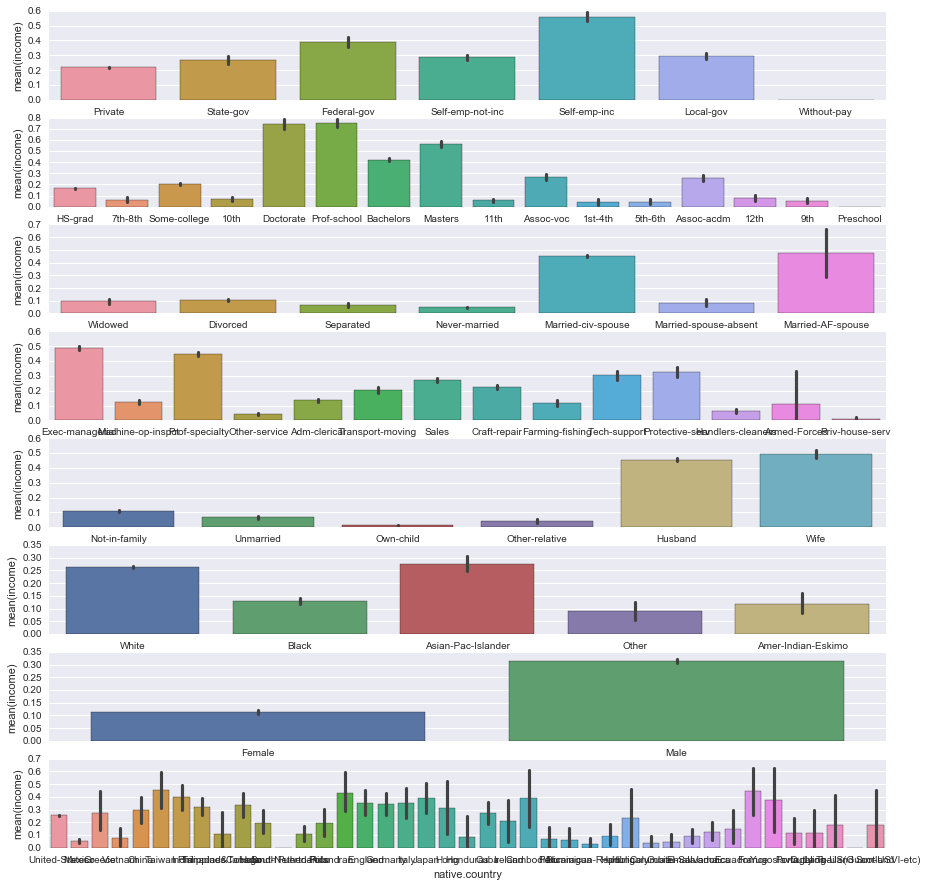

In [8]:
#### Share of +50K$ individuals per categorical variables values ####

f, axs = plt.subplots(8,1,figsize=(15,15))

for ind,elem in enumerate(quali_features) :
    plt.subplot(8,1,ind+1)
    sns.barplot(x=elem, y='income', data=df_copy)

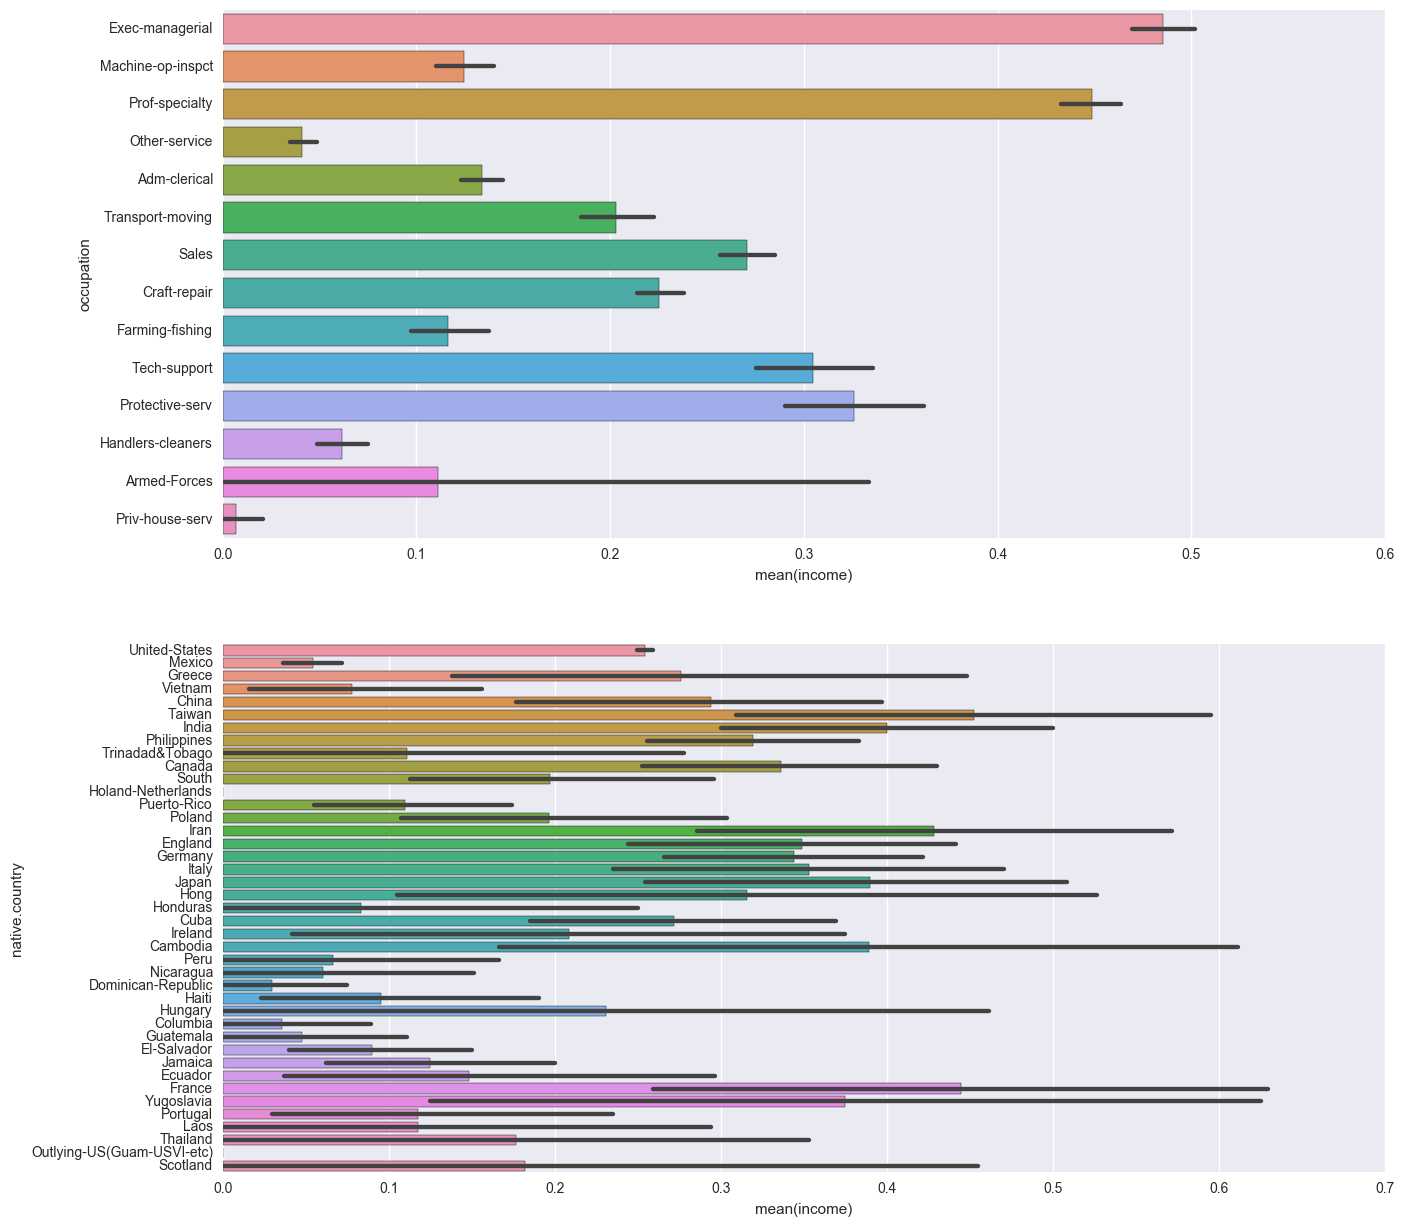

In [9]:
#### Share of +50K$ individuals per categorical variables values ####
# Horizontal Barplots for a better visibility #

f, axs = plt.subplots(2,1,figsize=(15,15))

for ind,elem in enumerate(["occupation", "native.country"]) :
    plt.subplot(2,1,ind+1)
    sns.barplot(y=elem, x='income', data=df_copy)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The education level is a discriminatory factor. The proportion of high-income individuals among Master, Doctorants and Professional Schools is higher than 60% versus less than 10% for people who didn't attend post-secondary education. Bacherlor degrees, vocational assocations and administrative associations represent an intermediate category.<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The gender is also discriminatory : 30% of male individuals have a high level of wealth whereas only roughly 10 % of female persons are "wealthy".<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Lastly, the native country is also decisive. France and Taiwan display a proportion of roughly 45% high-income individuals versus less than 5% for Columbia and Dominican Republic.

## C) Quantitative variables
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Secondly, we explore the discriminatory power of the quantitative variables. We examine their distribution but also the correlation between them, especially with the label "income".

age  :  min =  17  , max =  90
education.num  :  min =  1  , max =  16
capital.gain  :  min =  0  , max =  99999
capital.loss  :  min =  0  , max =  4356
hours.per.week  :  min =  1  , max =  99
income  :  min = 

//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


 0  , max =  1


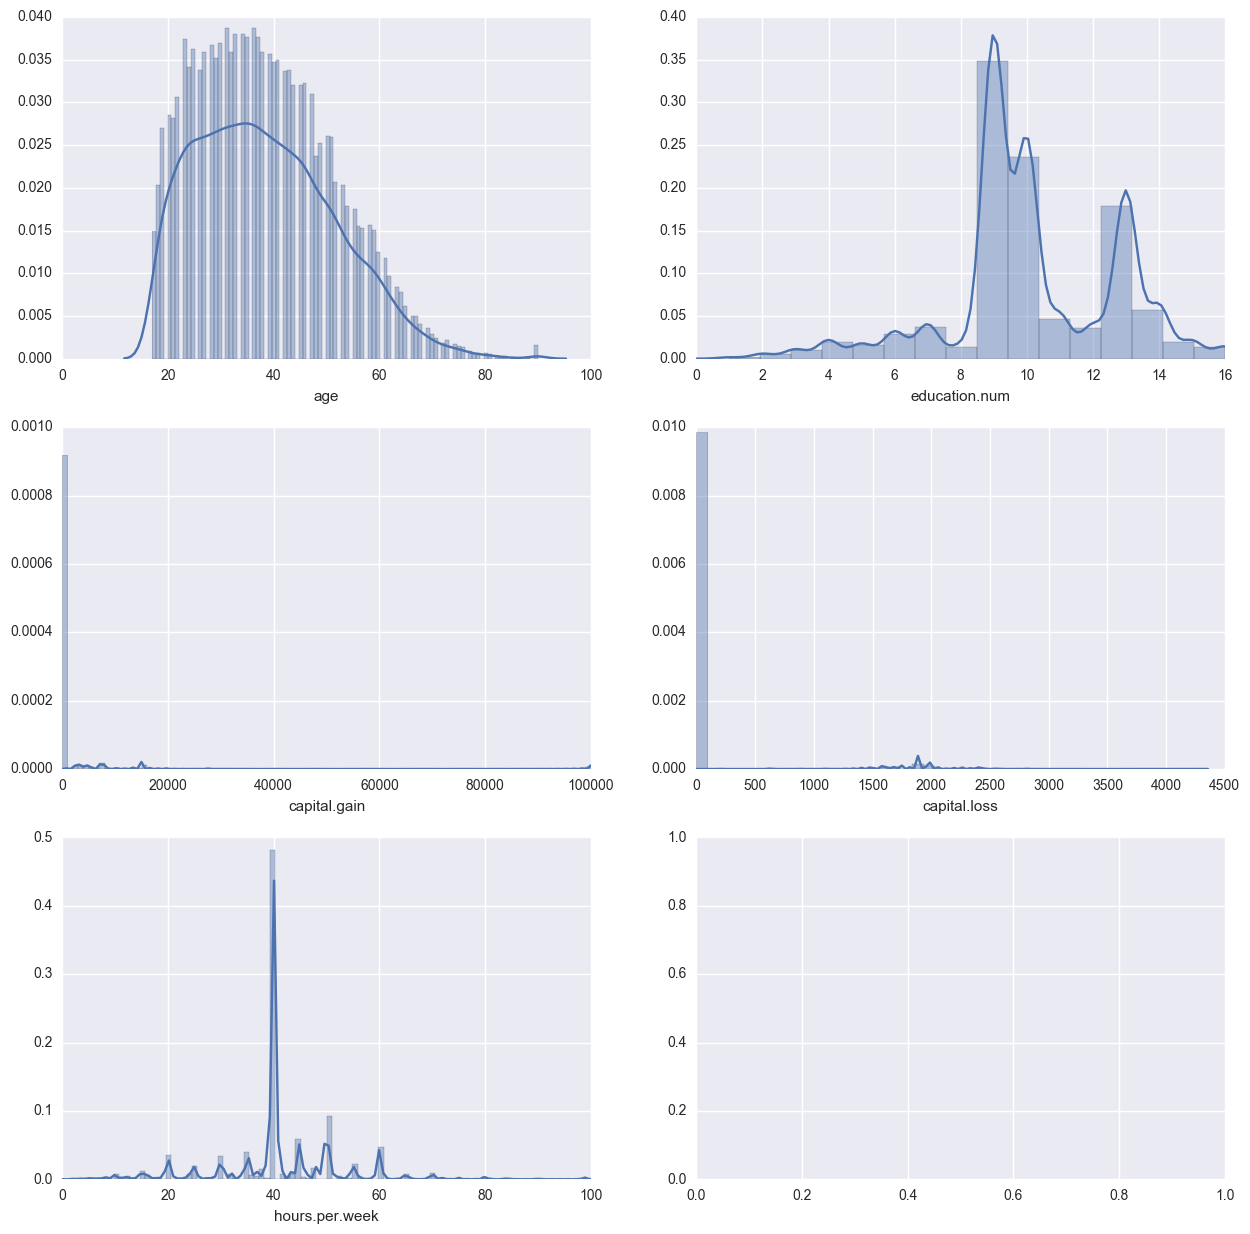

In [11]:
#### Quantitative variables distribution ####

# quanti_features = ['age', 'education.num', 'capital.gain', 'capital.loss', "hours.per.week", 'income']

for elem in quanti_features :
    print(str(elem), " : ", "min = ", min(df_copy[elem]), " , max = ", max(df_copy[elem]))
    
f, axs = plt.subplots(3,2,figsize=(15,15))

plt.subplot(321)
plt.xlim(0, 100)
sns.distplot(df_copy['age'], bins=100)

plt.subplot(322)
plt.xlim(0, 16)
sns.distplot(df_copy['education.num'], bins=16)

plt.subplot(323)
plt.xlim(0, 100000)
sns.distplot(df_copy['capital.gain'], bins=100)

plt.subplot(324)
plt.xlim(0, 4500)
sns.distplot(df_copy['capital.loss'], bins=45)

plt.subplot(325)
plt.xlim(0, 100)
sns.distplot(df_copy['hours.per.week'], bins=100)

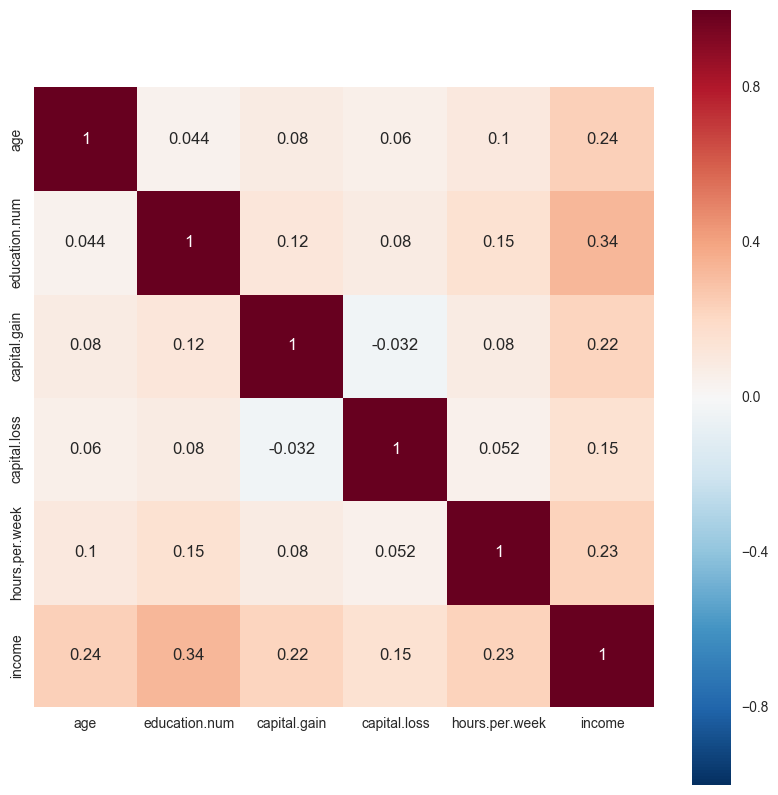

In [12]:
## Heatmap : 
df_quanti = df_copy[quanti_features]
corrmat = df_quanti.corr()
f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(corrmat, vmax=1, square=True,annot=True)#,fmt='.2f'))
plt.show()

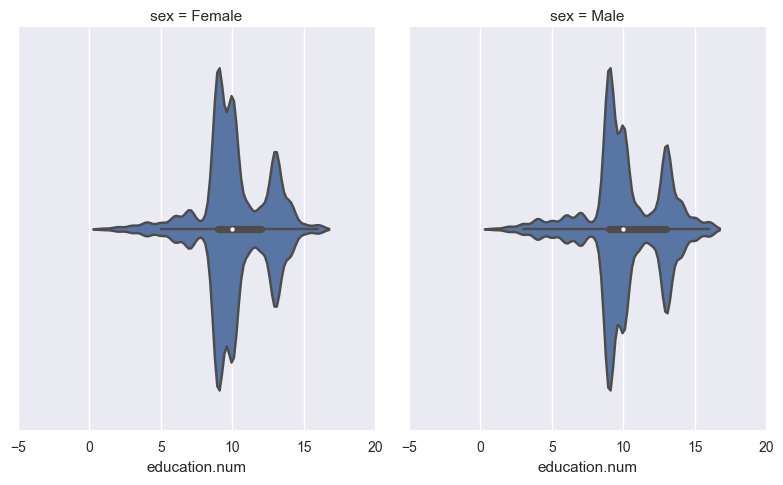

In [59]:
## Violin plot : distribution of the number of years of education by gender ##
sns.factorplot("education.num", col = "sex", data=df_copy, kind="violin", size=5, aspect=.8)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;On one hand, some variables have a very inegal distribution and motivate to build aggregated variables corresponding to those distributions. Almost all the individuals have netiher capital gain nor loss : the share of people who own capital investments is very low. We can assume that only the wealthiest people are concerned. We will therefore be interested in building an aggregate binary variable accounting for the proportion of "+50K people" depending on the presence or absence of capital income.<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Similarly, most people work 40 hours per week. We will therefore compute the share of "+50K individuals" depending on more, less or exactly 40 worked hours per week.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;On the other hand, our heatmap exhibits a relatively strong correlation of the years of education with the label "income". The correlation coefficient is 0.34. Moreover, while "capital.gain", "capital.loss" et "hours.per.week" should be correlated with the wealth level of individuals, their correlation coefficient with "income" is low : respectively 0.22, 0.15 and 0.23. The previously suggested aggregated variables seem to be necessary to model the impact of those factors.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Lastly, the number of years of education is correlated with the gender and a higher proportion of women have studied more than 10 years, compared with their male counterparts. It suggets that the discrimination against women may be weakened by higher education levels. We will also build the corresponding aggregate variable.

# II ) Classification models applied to dummy variables

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We showed that some values of categorical variables seem to be discriminatory. Therefore, we firstly build a df_1 base with a dummy variable for each value of categorical variables.<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We then apply and compare 3 classifiction methods : logistic regression, KNN and random forest algorithms. The comparisons are made through several metrics : the F1 score and accuracy scores represent general criteria, while precision and recall scores are more specific measures. We will see that the recall score is the metric which fits the most the specificity of our project.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Building dummy variables will facilitate the optimisation of our models. Indeed, we can perform a feature selection step which eliminates the variables corresponding to values with a small discriminatory power.

In [8]:
## Import classification algorithms

## Training and test sets :
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score # k-fold cross validation

## Classification models :
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

## Metrics and scores :
from sklearn import metrics
from sklearn.metrics import (precision_score, recall_score,
                             f1_score, accuracy_score)

## Features selection :
from sklearn.feature_selection import RFE

## Model calibration :
from sklearn.metrics import precision_recall_curve

## A ) Training and test sets

In [15]:
#### Database with dummy variables ####
df_1 = pd.get_dummies(df_copy)
df_1.tail()

,age,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
32556,22,10,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32557,27,12,0,0,38,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32558,40,9,0,0,40,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32559,58,9,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32560,22,9,0,0,20,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [16]:
#### Training and test sets #### 
y_1 = df_1['income'].values
df_1_X = df_1.drop(['income'],axis=1)
X_1 = df_1_X.values
    
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.25)

## B ) Comparison of the 3 classification models applied on df_1

We compare 3 classification models (logistic regression, KNN and random forest algorithms), through 4 metrics (accuracy, F1, precision and recall scores).<br/>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;First, the accuracy score is a measure of the global predictive quality of a model. Then, we precise that metric with the three latter metrics. The precision score measures the proportion $\frac{true\ positives}{true\ positives + false\ positives}$   : the individuals who really have an annual income higher than 50 000 US$, among those who have been predicted as "wealthy". The recall score measures the share of predicted "+ 50K US dollars" among all the "+ 50K US dollars". The F1 score is a harmonic mean of those two scores 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;These metrics will quantify the improvements of the predictive quality of our models induced by the feature engineering and model recalibration steps. In particular, the trade-off between the recall and precision scores will guide the calibration of the model : Precision/Recall curve.

In [36]:
#### Comparison of the metrics :
lr = LogisticRegression()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()

for clf, name in [(lr, 'Logistic regression'),
                  (rf, "Random Forest"),
                  (knn, "KNN")]:
    clf.fit(X_train, y_train)
    y_1_pred = clf.predict(X_test)


    print("%s:" % name)
    # print("\tBrier: %1.3f" % (clf_score))
    print("\tAccuracy Score: %1.4f" % accuracy_score(y_test, y_1_pred))
    print("\tPrecision: %1.4f" % precision_score(y_test, y_1_pred))
    print("\tRecall: %1.4f" % recall_score(y_test, y_1_pred))
    print("\tF1: %1.4f" % f1_score(y_test, y_1_pred))

Regression logistique:
	Accuracy Score: 0.8482
	Precision: 0.7399
	Recall: 0.5808
	F1: 0.6508
Random Forest:
	Accuracy Score: 0.8434
	Precision: 0.7111
	Recall: 0.6015
	F1: 0.6517
KNN:
	Accuracy Score: 0.8429
	Precision: 0.6924
	Recall: 0.6385
	F1: 0.6644


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;On one hand, the 3 models seem to have a good and equivalent global predictive quality. Accuracy scores are similar : between 84.3% and 84.8%. Likewise, F1 scores are comparable : between 65.1% and 66.4%. Nevertheless, given our goal to especially detect tax evasion, the recall score, more specific, is the most adequate metric. Indeed, the priority is to detect all the individuals with high incomes, who are more likely to fraud. False negatives are more penalizing than false positives.<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Given this criterion, the KNN algorithm is clearly the most performant method, with a recall scores of 63,9% versus respectively 58,1% and 60,2% for the logistic regrassion and the random forest.<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;To conclude, the KNN algorithm is the most efficient classification method, given the specificty of our analysis.

# III ) Models optimization : feature engineering and models calibration

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;After having applied 3 standardized classification methods, we improve the predictive quality of each of them through features engineering and model calibration methods.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Through features selection, we will tackle the issue of features colinearity. We will also add aggregated features in order to improve the quality of the models.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Moreover, we will calibrate the parameters to the models in order to optimize their predictive quality. For example, find the optimal number of neighbors of the KNN algorithm, or calibrate the logistic regression threshold in order and achieve a trade-off between precision and recall scores. We will use the Precison/Recall curve. <br/>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Nevertheless, for the logistic regression, we will only examine the possibilities of recalibration of the Precison/Recall curve, without implementing them. However, the analysis is still relevant for our analysis.

## A ) Features selection
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We have 103 features and some of them are colinear or not relevant.To tackle this issue, we perform a features selection step with a recursive features elimination method.

### 1) Features selection : logistic regression 

In [18]:
#### Features selection : logistic regression :
liste_features = []
liste_accuracy_scores = []
liste_f1_scores = []
liste_recall = []
liste_precision = []

for k in range(1,104) :
    selector = RFE(lr, k, step=1)
    selector = selector.fit(X_1, y_1)
    features = df_1_X.columns[selector.support_]
    liste_features.append(features)
    # training and test sets :
    # y_1 = df_1['income'].values
    df_1_X_rfe = df_1_X[features]
    X_1_rfe = df_1_X_rfe.values
    X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(X_1_rfe, y_1, test_size=0.25)
    
    # Reg log :
    lr.fit(X_train_rfe, y_train_rfe)
    y_1_pred_rfe = lr.predict(X_test_rfe)
    
    # Scores : 
    liste_accuracy_scores.append(accuracy_score(y_test_rfe, y_1_pred_rfe))
    liste_f1_scores.append(precision_score(y_test_rfe, y_1_pred_rfe))
    liste_recall.append(recall_score(y_test_rfe, y_1_pred_rfe))
    liste_precision.append(f1_score(y_test_rfe, y_1_pred_rfe))

    print(k, accuracy_score(y_test_rfe, y_1_pred_rfe))


//anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


1 0.7445962074
2 0.756796180878
3 0.758520090174
4 0.773107014985
5 0.758785306988
6 0.773902665429
7 0.760509216284
8 0.761172258321
9 0.764885293728
10 0.765813552579
11 0.768730937541
12 0.764089643283
13 0.763161384432
14 0.759978782655
15 0.770587455245
16 0.77284179817
17 0.776157008354
18 0.774300490651
19 0.769526587986
20 0.787163506166
21 0.812889537197
22 0.814083012863
23 0.814613446493
24 0.816602572603
25 0.815276488529
26 0.821111258454
27 0.823498209787
28 0.816867789418
29 0.815011271715
30 0.815939530566
31 0.819652565973
32 0.820978650046
33 0.821906908898
34 0.821376475269
35 0.821243866861
36 0.823763426601
37 0.814083012863
38 0.818459090306
39 0.82230473412
40 0.82283516775
41 0.821641692083
42 0.823498209787
43 0.815011271715
44 0.81421562127
45 0.82482429386
46 0.819387349158
47 0.821111258454
48 0.827476462008
49 0.821111258454
50 0.83291340671
51 0.825752552712
52 0.82535472749
53 0.823630818194
54 0.821509083676
55 0.828006895637
56 0.82283516775
57 0.830526

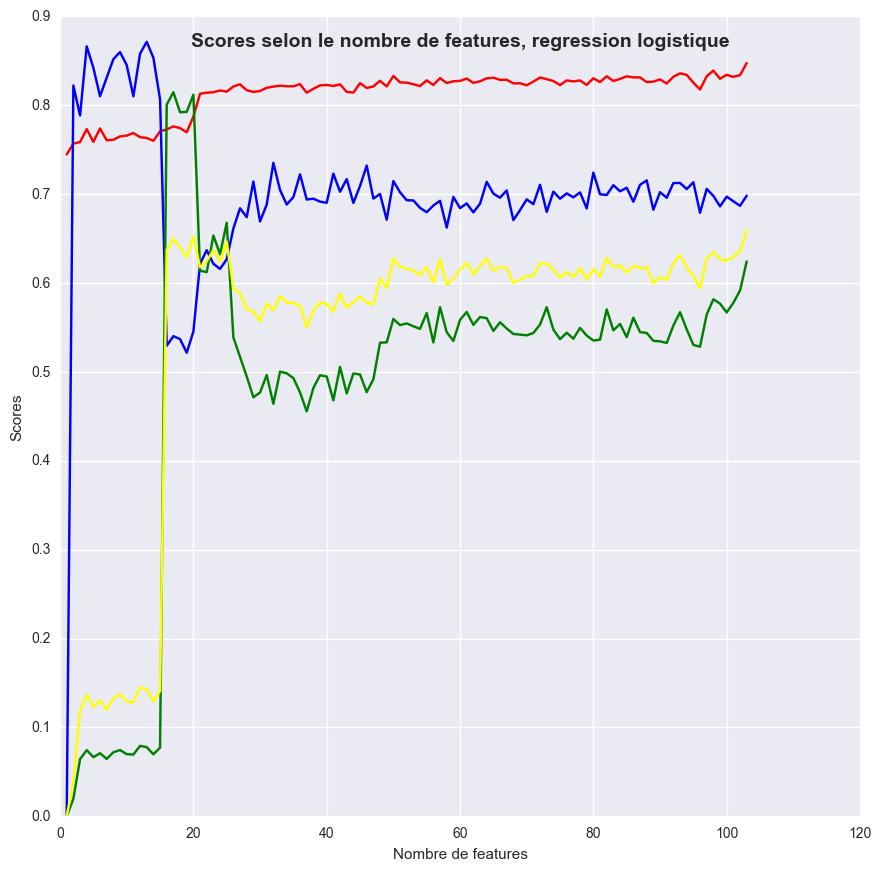

In [20]:
## Curves : Scores/number of features
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0,0,1,1])
fig.suptitle('Scores by number of features, logistic regression', fontsize=14, fontweight='bold')
ax.set_xlabel('Number of features')
ax.set_ylabel('Scores')

plt.plot(range(1,104),liste_accuracy_scores,'red') # accuracy score in red
plt.plot(range(1,104),liste_f1_scores,'blue')      # F1 score in blue
plt.plot(range(1,104),liste_recall,'green')        # recall score in green
plt.plot(range(1,104),liste_precision,'yellow')    # precision score in yellow
plt.show()

In [21]:
print("Number of features maximising the recall score : ", len(liste_features[liste_recall.index(max(liste_recall))]) )
print("Corresponding recall score : ", max(liste_recall))
print("Corresponding features : ", liste_features[liste_recall.index(max(liste_recall))])

Nombre de features maximisant le score de rappel :  17
Score de rappel correspondant :  0.814679854243
Features correspondantes :  Index(['workclass_Without-pay', 'education_10th', 'education_11th',
       'education_7th-8th', 'education_9th', 'education_Doctorate',
       'education_Preschool', 'education_Prof-school',
       'marital.status_Married-AF-spouse', 'marital.status_Married-civ-spouse',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'relationship_Own-child', 'native.country_Columbia',
       'native.country_Mexico'],
      dtype='object')


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The recursive features elimination is efficient : the recall score of the logistic regression have increased by 23.4 points, from 58.1% to 81.5%.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The selected variables are : being a doctorant, not attenting post-secondary education or being a native Colombian. Those variables corresponds with the disciminatory values exhibit in our exploratory analysis. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Therefore, the features selection have improved our model, in particular by retaining the most discriminatory features.

In [22]:
## Building a new database with selected features for the logistic regression :
df_2_lr = df_1[liste_features[liste_recall.index(max(liste_recall))]]
df_2_lr['income'] = df_1['income']
df_2_lr.tail()

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,workclass_Without-pay,education_10th,education_11th,education_7th-8th,education_9th,education_Doctorate,education_Preschool,education_Prof-school,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Other-service,occupation_Priv-house-serv,relationship_Own-child,native.country_Columbia,native.country_Mexico,income
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
11,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
12,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


### 2) Features selection : random forest

In [23]:
#### Features selection for the random forest :
liste_features_rf = []
liste_accuracy_scores_rf = []
liste_f1_scores_rf = []
liste_recall_rf = []
liste_precision_rf = []

for k in range(1,104) :
    selector_rf = RFE(rf, k, step=1)
    selector_rf = selector_rf.fit(X_1, y_1)
    features_rf = df_1_X.columns[selector_rf.support_]
    liste_features_rf.append(features_rf)
    # Training and test sets for the random forest
    df_1_X_rfe_rf = df_1_X[features_rf]
    X_1_rfe_rf = df_1_X_rfe_rf.values
    X_train_rfe_rf, X_test_rfe_rf, y_train_rfe_rf, y_test_rfe_rf = train_test_split(X_1_rfe_rf, y_1, test_size=0.25)

    # rf :
    rf.fit(X_train_rfe_rf, y_train_rfe_rf)
    y_1_pred_rfe_rf = rf.predict(X_test_rfe_rf)

    # Scores : 
    liste_accuracy_scores_rf.append(accuracy_score(y_test_rfe_rf, y_1_pred_rfe_rf))
    liste_f1_scores_rf.append(precision_score(y_test_rfe_rf, y_1_pred_rfe_rf))
    liste_recall_rf.append(recall_score(y_test_rfe_rf, y_1_pred_rfe_rf))
    liste_precision_rf.append(f1_score(y_test_rfe_rf, y_1_pred_rfe_rf))

    print(k, accuracy_score(y_test_rfe_rf, y_1_pred_rfe_rf))

//anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


1 0.752552711842
2 0.808380851346
3 0.84299164567
4 0.841798170004
5 0.818591698714
6 0.82230473412
7 0.838880785042
8 0.835565574857
9 0.835565574857
10 0.831189497414
11 0.833178623525
12 0.842859037263
13 0.833311231932
14 0.842593820448
15 0.842063386819
16 0.835167749635
17 0.835300358043
18 0.837422092561
19 0.838880785042
20 0.838748176634
21 0.838217743005
22 0.838350351412
23 0.833178623525
24 0.839941652301
25 0.835830791672
26 0.839278610264
27 0.844848163374
28 0.836626442116
29 0.837422092561
30 0.834504707598
31 0.842859037263
32 0.826548203156
33 0.842593820448
34 0.842726428856
35 0.841798170004
36 0.840074260708
37 0.845643813818
38 0.844980771781
39 0.838350351412
40 0.839941652301
41 0.844980771781
42 0.841798170004
43 0.838350351412
44 0.842726428856
45 0.84299164567
46 0.846837289484
47 0.847102506299
48 0.839676435486
49 0.838350351412
50 0.839146001857
51 0.843389470892
52 0.840074260708
53 0.83848295982
54 0.841930778411
55 0.843256862485
56 0.835698183265
57 0.

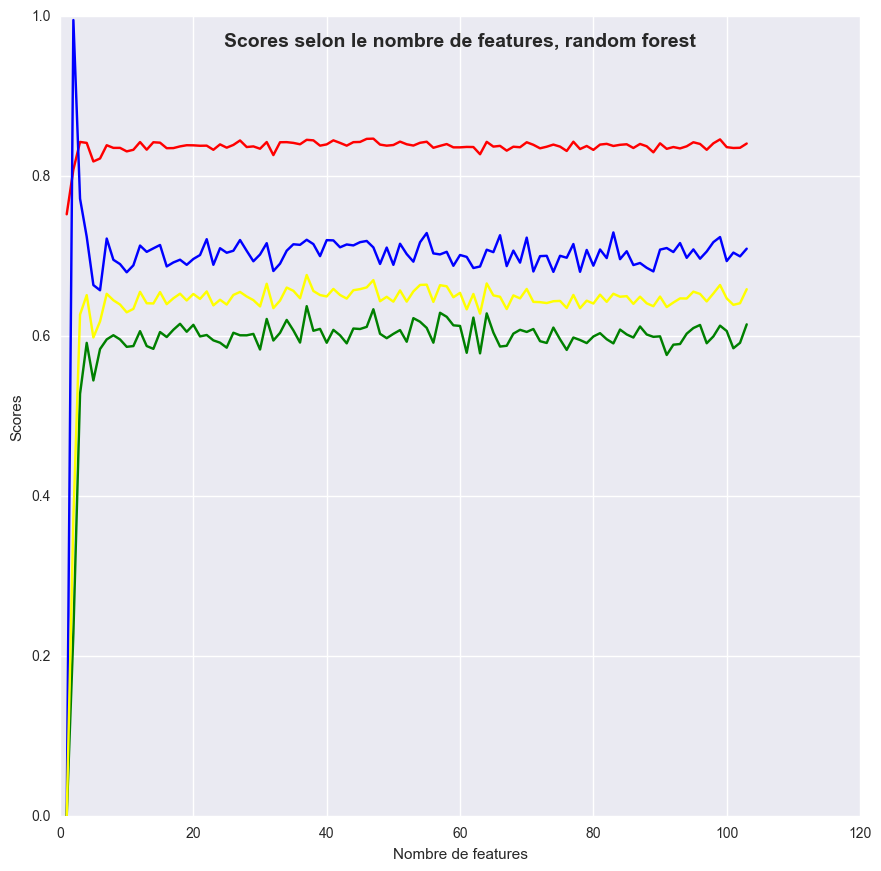

In [24]:
## Curves : Scores/number of features
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0,0,1,1])
fig.suptitle('Scores by number of features, random forest', fontsize=14, fontweight='bold')
ax.set_xlabel('Number of features')
ax.set_ylabel('Scores')

plt.plot(range(1,104),liste_accuracy_scores_rf,'red') # accuracy score en rouge
plt.plot(range(1,104),liste_f1_scores_rf,'blue')      # F1 score en bleu
plt.plot(range(1,104),liste_recall_rf,'green')        # Score de rappel en vert
plt.plot(range(1,104),liste_precision_rf,'yellow')    # Score de précision en jaune
plt.show()

In [25]:
print("Number of features maximising the recall score : ", len(liste_features_rf[liste_recall_rf.index(max(liste_recall_rf))]))
print("Corresponding recall score : ", max(liste_recall_rf))
print("Corresponding features : ", liste_features_rf[liste_recall_rf.index(max(liste_recall_rf))])

Nombre de features maximisant le score de rappel :  37
Score de rappel correspondant :  0.637696335079
Features correspondantes :  Index(['age', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'education_Bachelors', 'education_HS-grad', 'education_Masters',
       'education_Some-college', 'marital.status_Divorced',
       'marital.status_Married-civ-spouse', 'marital.status_Never-married',
       'occupation_Adm-clerical', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Prof-specialty', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'relationship_Husband', 'relationship_Not-in-family',
       'relationship_Unmarried', '

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The recursive features elimination is efficient : the recall score of the logistic regression have increased by 3.6 points, from 60.2% to 63.8%.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Again the selected variables are corresponds with the disciminatory values exhibit in our exploratory analysis. As for the logistic regression, we retain : being a doctorant, not attenting post-secondary education but also features that weren't retained the logisic regression such as : being a man, a women. Features relative to the "race" variable are also retained such as : "Black" or "White".

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Again, the features selection have improved our model, in particular by retaining the most discriminatory features.

In [26]:
## Building a new database with selected features for the random forest :
df_2_rf = df_1[liste_features_rf[liste_recall_rf.index(max(liste_recall_rf))]]
df_2_rf['income'] = df_1['income']
df_2_rf.tail()

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,age,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Husband,relationship_Not-in-family,relationship_Unmarried,relationship_Wife,race_Black,race_White,sex_Female,sex_Male,native.country_United-States,income
1,82,9,0,4356,18,0,0,1,0,0,...,0,1,0,0,0,1,1,0,1,0
3,54,4,0,3900,40,0,0,1,0,0,...,0,0,1,0,0,1,1,0,1,0
4,41,10,0,3900,40,0,0,1,0,0,...,0,0,0,0,0,1,1,0,1,0
5,34,9,0,3770,45,0,0,1,0,0,...,0,0,1,0,0,1,1,0,1,0
6,38,6,0,3770,40,0,0,1,0,0,...,0,0,1,0,0,1,0,1,1,0
7,74,16,0,3683,20,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,1
8,68,9,0,3683,40,1,0,0,0,0,...,0,1,0,0,0,1,1,0,1,0
10,45,16,0,3004,35,0,0,1,0,0,...,0,0,1,0,1,0,1,0,1,1
11,38,15,0,2824,45,0,0,0,0,1,...,0,1,0,0,0,1,0,1,1,1
12,52,13,0,2824,20,0,0,1,0,0,...,0,1,0,0,0,1,1,0,1,1


## B) KNN algorithm : choice of the optimal k

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In order to improve our KNN algorithm, we decide to optimize the choice of the parameter k (number of neighbors), not the choice of the features.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We compare the recall score for $k= 1,...,30$ and strenghten our method by applying a 5-fold cross validation for each k. We will choose the value of k which maiximizes the mean of recall scores among the 5 training subsamples of the cross validation.

### 1) Optimal K

In [37]:
## Choice of the optimal k for the KNN algorithm :
cv_scores = []

for k in range(1,31) :
    knn = KNeighborsClassifier(n_neighbors =k)
    knn.fit(X_train, y_train)
    y_1_pred_knn = knn.predict(X_test)
    cv_scores.append(recall_score(y_test, y_1_pred_knn))


    print("k = ", k)
    print("\tAccuracy Score: " % accuracy_score(y_test, y_1_pred_knn))
    print("\tPrecision: " % precision_score(y_test, y_1_pred_knn))
    print("\tRecall: " % recall_score(y_test, y_1_pred_knn))
    print("\tF1: " % f1_score(y_test, y_1_pred_knn))  

k =  1
	Accuracy Score: 0.8147
	Precision: 0.6155
	Recall: 0.6380
	F1: 0.6266
k =  2
	Accuracy Score: 0.8409
	Precision: 0.7692
	Recall: 0.4954
	F1: 0.6026
k =  3
	Accuracy Score: 0.8334
	Precision: 0.6648
	Recall: 0.6380
	F1: 0.6511
k =  4
	Accuracy Score: 0.8437
	Precision: 0.7437
	Recall: 0.5465
	F1: 0.6301
k =  5
	Accuracy Score: 0.8429
	Precision: 0.6924
	Recall: 0.6385
	F1: 0.6644
k =  6
	Accuracy Score: 0.8507
	Precision: 0.7639
	Recall: 0.5602
	F1: 0.6464
k =  7
	Accuracy Score: 0.8494
	Precision: 0.7160
	Recall: 0.6326
	F1: 0.6717
k =  8
	Accuracy Score: 0.8531
	Precision: 0.7591
	Recall: 0.5814
	F1: 0.6584
k =  9
	Accuracy Score: 0.8513
	Precision: 0.7238
	Recall: 0.6304
	F1: 0.6738
k =  10
	Accuracy Score: 0.8513
	Precision: 0.7525
	Recall: 0.5808
	F1: 0.6556
k =  11
	Accuracy Score: 0.8496
	Precision: 0.7204
	Recall: 0.6255
	F1: 0.6696
k =  12
	Accuracy Score: 0.8527
	Precision: 0.7535
	Recall: 0.5874
	F1: 0.6601
k =  13
	Accuracy Score: 0.8537
	Precision: 0.7362
	Recall: 0

Nombre k de voisins maximisant le score de rappel :  5
Score de rappel correspondant :  0.638541099619


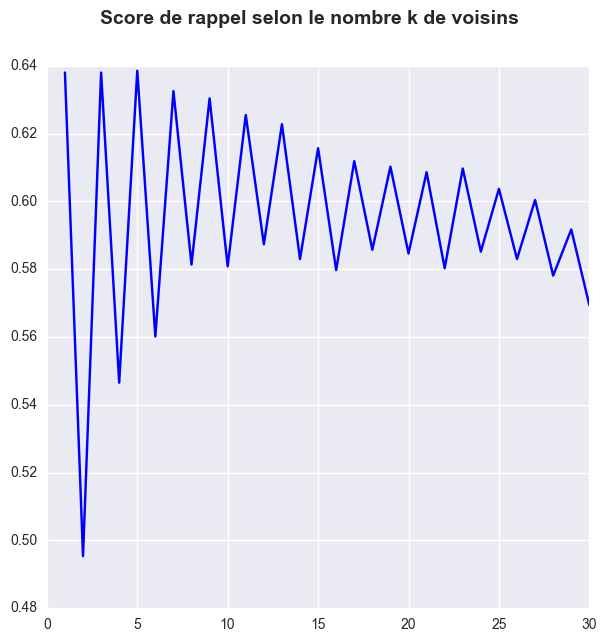

In [38]:
fig = plt.figure(figsize=(7,7))
fig.suptitle('Recall score by k', fontsize=14, fontweight='bold')
ax.set_xlabel('k')
ax.set_ylabel('Recall score')

plt.plot(range(1,31), cv_scores, 'blue')

print("Number of neighbors, k, maximising the recall score : ", (cv_scores.index(max(cv_scores))+1))
print("Corresponding recall score : ", max(cv_scores))

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The optimal choice for k is $k= 5$, but doesn't result in a significative improvement of the quality of the classifier. Indeed, for both $k= 5$ and $k= 3$ (default value), the score is equal to 63.85%.<br\>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In order to improve the robustness of our choice we strenghten our comparison by applying a 5-fold cross-validation for each k.

In [39]:
## Choice of the optimal k , with 5-fold cross-validation
cv_scores_5_fold = []

for k in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='recall')
    cv_scores_5_fold.append(scores.mean())
    print("k = ", k)
    print("Mean recall scores, cross-validation : ", scores.mean())

k =  1
moyenne des scores de rappel par cross-validation :  0.639041092697
k =  2
moyenne des scores de rappel par cross-validation :  0.497264526956
k =  3
moyenne des scores de rappel par cross-validation :  0.644684365507
k =  4
moyenne des scores de rappel par cross-validation :  0.549991531284
k =  5
moyenne des scores de rappel par cross-validation :  0.64468374395
k =  6
moyenne des scores de rappel par cross-validation :  0.566213862278
k =  7
moyenne des scores de rappel par cross-validation :  0.642039950586
k =  8
moyenne des scores de rappel par cross-validation :  0.576618573682
k =  9
moyenne des scores de rappel par cross-validation :  0.632341328112
k =  10
moyenne des scores de rappel par cross-validation :  0.581378924551
k =  11
moyenne des scores de rappel par cross-validation :  0.625287897505
k =  12
moyenne des scores de rappel par cross-validation :  0.586141295481
k =  13
moyenne des scores de rappel par cross-validation :  0.620879347987
k =  14
moyenne des sc

Nombre k de voisins maximisant le score de rappel moyen :  3
Score de rappel moyen correspondant :  0.644684365507


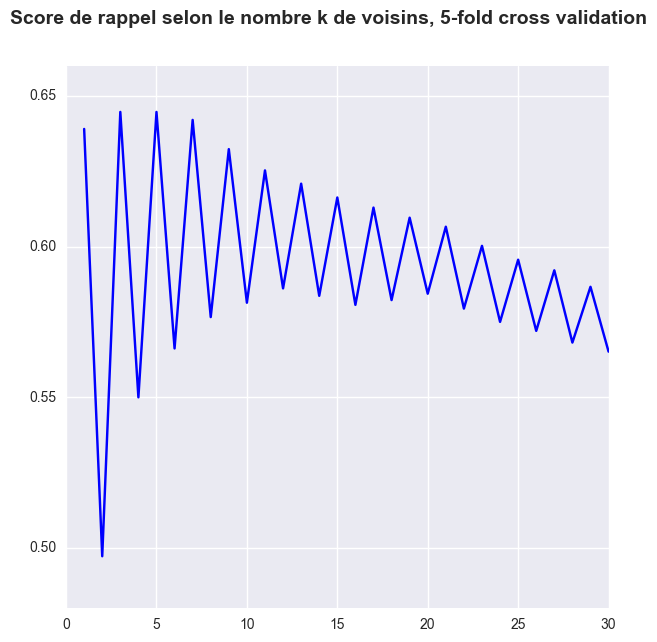

In [40]:
fig = plt.figure(figsize=(7,7))
fig.suptitle('Recall score by k, 5-fold cross validation', fontsize=14, fontweight='bold')
ax.set_xlabel('k')
ax.set_ylabel('Recall score')

plt.plot(range(1,31), cv_scores_5_fold, 'blue')

print("Number of neighbors, k, maximising the recall score : ", (cv_scores_5_fold.index(max(cv_scores_5_fold))+1))
print("Corresponding recall score : ", max(cv_scores_5_fold))

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5-fold cross validation consists in subsampling the database into 5 samples and performing a KNN algorithm trained on each subsample and tested on the 4 others subsamples. We have examined the mean of the 5 recall scores among the 5 subsamples.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Again, the predictive quality of the model is maximal for $k = 3$ but with a very similar recall score for $k=5$ : respectively 64.46843% and 64.46837%. 

## C) Precision/Recall curve : logistic regression calibration

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We now analyse the possibility to calibrate our logistic regression through the threshold determining whether an individual would be predicted as "wealthy" (positive) or not (negative).

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In particular, we will examine the possibility to define a threshold that improves the recall score without penalizing the precision score. Indeed, if we diminish the threshold in order to increase the share of true positives among the positives, it may results in a smaller raise of the true positives than the increase of the false positives. Then, improving the recall score deteriorates the precision score. This trade-off may be optimize.

Score de rappel au seuil actuel 0.797434526991
Score de précision au seuil actuel: 0.528515763372


(0.0, 1.0)

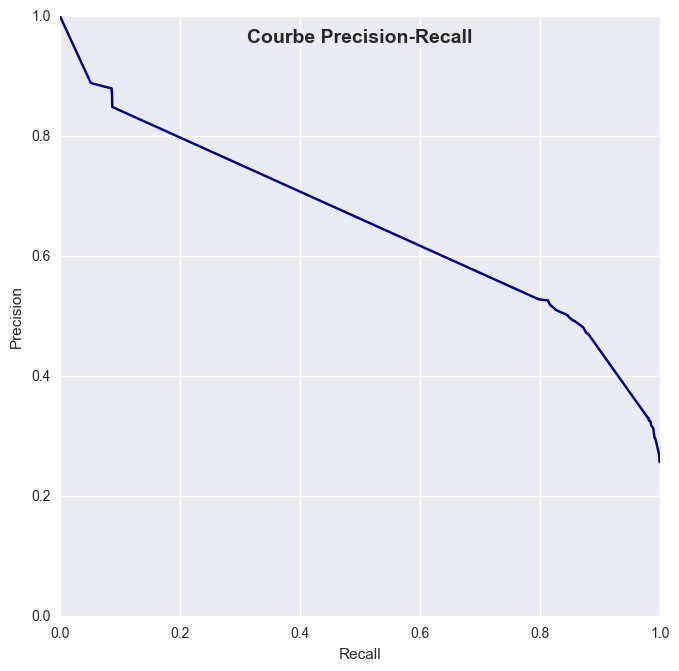

In [41]:
#### Building training and test sets : 

## Logistic regression :
# We build a training and test sets from the df_2_lr base.
# It only contains the 17 features that are optimal for the logistic regression.
y_2_lr = df_2_lr['income'].values
df_2_lr_X = df_2_lr.drop(['income'],axis=1)
X_2_lr = df_2_lr_X.values
    
X_train_2_lr, X_test_2_lr, y_train_2_lr, y_test_2_lr = train_test_split(X_2_lr, y_2_lr, test_size=0.25)


#### Precision/Recall curve :
y_score_lr = lr.fit(X_train_2_lr, y_train_2_lr).decision_function(X_test_2_lr)
lr.fit(X_train_2_lr, y_train_2_lr)
y_2_pred_lr = lr.predict(X_test_2_lr)

print("Recall score, current threshold", recall_score(y_test_2_lr, y_2_pred_lr))
print("Precision score, current threshold:", precision_score(y_test_2_lr, y_2_pred_lr))
precision, recall, _ = precision_recall_curve(y_test_2_lr, y_score_lr)


fig = plt.figure(figsize=(6,6))
ax = fig.add_axes([0,0,1,1])
fig.suptitle('Precision/Recall curve', fontsize=14, fontweight='bold')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')

plt.plot(recall, precision, color='navy',
         label='Precision/Recall curve')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We can observe a plateau on the graph for recall = 80%. This plateau exhibits the possibility for increasing the recall score without deteriorating the precision score. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Moreover, the recall score for the threshold value by default was 81.5% and corresponds to a value "close" to the plateau on the graph. Therefore, a recalibration with no decrease of the precison score would be possible in our case.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Unfortunately, we won't apply this recalibration because of lack of Python knowledge. However, it is important to raise this possibility.

## D) Addition of aggregated variables

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Eventually, we try to improve our models by adding aggregated values. In particular, some variables seemed to be defined such that their discriminatory power was weakened. Adding relevant aggregated features may solve this issue.<br\>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The value of capital losses or gains exhibited a low correlation coefficient with our label "income" : respectively 0.22 and 0.15. But we can assume the concentration of "wealthy" people to be higher among the capital investments owners than among others. Therefore, building a binary variable for the share of high-income indivuduals depending on the possession of capital investments may model the discriminatory power of this aspect.<br\>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Moreover, as observed in our exploratory analysis, most people work 40 hours per week. People who work more than this threshold may then exhibit a higher proportion of high-income individuals, as they work relatively more than the total population. Despite a low correlation coefficent between the number of worked hours per week and the label "income", this criterion seems therefore to be discriminatory. Thus, we build a variable accounting for the share of high-income individuals among those who work exactly, less or more than 40 hours.<br\>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Finally, the label "income" is correlated with both the gender and the number of years of education (correlation coefficient : 0.34). Thus, we build a feature for the mean number of years of education by gender.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We compare the recall and accuracy scores with and without our aggregated variables. To improve the robustness of our method, we measure the mean gap over 10 simulations.

### 1) Construction of aggregated variables 

In [51]:
## Binary variable : presence versus absence of capital income
df_copy['indicatrice_rev_capitaux'] = 0
df_copy['indicatrice_rev_capitaux'][(df_copy['capital.gain']!=0) | (df_copy['capital.loss']!=0)] = 1

## Proportion of high-income individuals among capital owners vs others
df_copy['part_50K_rev_capitaux'] = 0
df_copy['part_50K_rev_capitaux'][df_copy['indicatrice_rev_capitaux']== 1] = (df_copy['income'][df_copy['indicatrice_rev_capitaux']== 1]).mean()
df_copy['part_50K_rev_capitaux'][df_copy['indicatrice_rev_capitaux']== 0] = (df_copy['income'][df_copy['indicatrice_rev_capitaux']== 0]).mean()

## Variable indicating if an indvidual works more, less or exactly 40 hours per week
df_copy['heures_trav_40'] = 1
df_copy['heures_trav_40'][df_copy['hours.per.week']<40] = 0
df_copy['heures_trav_40'][df_copy['hours.per.week']>40] = 2

## Porportion of high-incomes individuals depending on the hours worked per week (threshold)
df_copy['part_50K_trav_40'] = 0
df_copy['part_50K_trav_40'][df_copy['heures_trav_40']== 0] = (df_copy['income'][df_copy['heures_trav_40']== 0]).mean()
df_copy['part_50K_trav_40'][df_copy['heures_trav_40']== 1] = (df_copy['income'][df_copy['heures_trav_40']== 1]).mean()
df_copy['part_50K_trav_40'][df_copy['heures_trav_40']== 2] = (df_copy['income'][df_copy['heures_trav_40']== 2]).mean()

## Mean number of years of education per gender
df_copy['genre_part_etudes'] = 0
df_copy['genre_part_etudes'][df_copy['sex'] == "Male"] = (df_copy['education.num'][df_copy['sex'] == "Male"]).mean()
df_copy['genre_part_etudes'][df_copy['sex'] == "Female"] = (df_copy['education.num'][df_copy['sex'] == "Female"]).mean()

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a co

### 2) Classifiers with aggregated variables

In [ ]:
#### Logistic regression :

## Construction of the database with aggregated variables :
df_2_lr_ag = pd.DataFrame.copy(df_2_lr)
df_2_lr_ag['indicatrice_rev_capitaux'] = df_copy['indicatrice_rev_capitaux']
df_2_lr_ag['part_50K_rev_capitaux'] = df_copy['part_50K_rev_capitaux']
df_2_lr_ag['heures_trav_40'] = df_copy['heures_trav_40']
df_2_lr_ag['part_50K_trav_40'] = df_copy['part_50K_trav_40']
df_2_lr_ag['genre_part_etudes'] = df_copy['genre_part_etudes']



Diff_rappel = []
Diff_accuracy = []

for i in range(1,11) : 
    print(i)

    ## Logistic regression without aggregated variables :
    y_2_lr = df_2_lr['income'].values
    df_2_lr_X = df_2_lr.drop(['income'],axis=1)
    X_2_lr = df_2_lr_X.values

    X_train_2_lr, X_test_2_lr, y_train_2_lr, y_test_2_lr = train_test_split(X_2_lr, y_2_lr, test_size=0.25)
    lr.fit(X_train_2_lr, y_train_2_lr)
    y_2_pred_lr = lr.predict(X_test_2_lr)

    print("Logistic regression")
    print("Recall score without aggregated variables: ", recall_score(y_test_2_lr, y_2_pred_lr))
    print("Precision score without aggregated variables: ", precision_score(y_test_2_lr, y_2_pred_lr))
    print("Accuracy score without aggregated variables", accuracy_score(y_test_2_lr, y_2_pred_lr))
    print("Accuracy score without aggregated variables: ", f1_score(y_test_2_lr, y_2_pred_lr))
    

    ## ## Logistic regression with aggregated variables :
    y_2_lr_ag = df_2_lr_ag['income'].values
    df_2_lr_X_ag = df_2_lr_ag.drop(['income'],axis=1)
    X_2_lr_ag = df_2_lr_X_ag.values

    X_train_2_lr_ag, X_test_2_lr_ag, y_train_2_lr_ag, y_test_2_lr_ag = train_test_split(X_2_lr_ag, y_2_lr_ag, test_size=0.25)
    lr.fit(X_train_2_lr_ag, y_train_2_lr_ag)
    y_2_pred_lr_ag = lr.predict(X_test_2_lr_ag)

    print()
    print("Recall score with aggregated variables: ", recall_score(y_test_2_lr_ag, y_2_pred_lr_ag))
    print("Precision score with aggregated variables: ", precision_score(y_test_2_lr_ag, y_2_pred_lr_ag))
    print("Accuracy score with aggregated variables: ", accuracy_score(y_test_2_lr_ag, y_2_pred_lr_ag))
    print("F1 score with aggregated variables: ", f1_score(y_test_2_lr_ag, y_2_pred_lr_ag))
    print()
    
    Diff_rappel.append((recall_score(y_test_2_lr_ag, y_2_pred_lr_ag)-recall_score(y_test_2_lr, y_2_pred_lr)))
    Diff_accuracy.append((accuracy_score(y_test_2_lr_ag, y_2_pred_lr_ag)-accuracy_score(y_test_2_lr, y_2_pred_lr)))

In [58]:
print("Results :")
print("Mean gap, recall score: ", (np.asarray(Diff_rappel)).mean())
print("Mean gap, accuracy score: ", (np.asarray(Diff_accuracy)).mean())

Résultats :
Différence moyenne de score de rappel :  -0.267360544366
Différence moyenne d'accuracy score de rappel :  0.033974273969


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Adding aggregated variables significatively deteriorate the recall score with a mean decrease of 26.7 points. The accuracy score increases very moderately.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The inefficency of our attempt can be due to the fact that values taken are to close. For example, the mean number of years of education for men and women is similar. Moreover, the built variables may be colinear with other variables.

# Conclusion 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We have tackled the issue of high-incomes individuals detection, in particular in order to diminish potential tax evasions.<br\>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We have compared 3 classification methods : logistic regression, KNN and random forest algorithm. The predictive quality of each method has been optimised by feature engineering steps and parameters calibration.
<br\>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We have used the recall score to measure the quality of each model as it precisely fits the specificity of our goal. Falses positives (people predicted as "wealthy" while they are not) are less penalizing than false negatives. The recall score is thus more relevant than the precision score for example.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Optimized through recursive features elimination, the logistic regression recall score increases by 23.4 points to 81.5%. The discriminatory variables are, for example, being a doctorant, a native Colombian, not attending post-secondary education. Recalibration of the acceptation threshold may also be a future way to improve the regression. Adding aggregated features didn't improve the predictive quality of our model.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The random forest displays a recall score of 63.8%, with an increase of 3.6 points through recursive features elimination. The retained features are, for example, the number of years of education and the gender.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The KNN algorithm recall score remains stable before and after the optimisation of the parameter k : the number of neighbors. Indeed, the recall score for the optimal value of k, k= 5, and the default one, k = 3, are both approximatively equal to 63.85%.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;To conclude, the most relevant and efficient method, given our specific goal, is our optimised logistic regression. We must underline that the optimisation step have made it more efficient than the KNN algorithm, which was the most relevant at first.<br\>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The model may still be improved through the addition of aggregated features more relevant than the ones we have tested. For example, categorical features with very distinct values and therefore a potentially high disciminatory power.